Project Name: Stock Portfolio Returns Analysis using Machine Learning and Optimisation Methods


TUM School of Management
Professor ...
Group Members:
1. Yen Vu Thi Ngoc
2. Rui Liu
3. Yesenia Marin Paniagua

# Table of Contents:
1. Introduction
2. Data Processing
3. Descriptive Analysis
4. Predictive Analysis
5. Prescriptive Analysis (Allocating Weights)
6. Rolling Portfolio
7. Performance Assessment
8. Conclusions
9. Limitations and Further Steps


# 1. Introduction

The project is conducted in order to delve into the analytical methodologies applied to financial data, specifically focusing on a stock portfolio of US-based large-cap companies in the Information Technology sector from 2022 - 2023. With the use of machine learning models and time series models, the analysis also aim to discover the optimal models to predict portfolio´s future returns.

# 2. Data Processing
* Import the necessary libraries
* Load the datasets into Pandas DataFrames
* Rename the data columns, remove uneccessary variables
* Convert 'date' column to datetime type, columns´s types into appropriate types
* Handling missing data

In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [53]:
# Importing stock daily trading of portfolio from 2022-01-01 until 2023-12-31
daily_trading = pd.read_csv("Stock_Daily_Trading.csv", sep= ",")
daily_trading

,PERMNO,date,EXCHCD,TICKER,COMNAM,PERMCO,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,OPENPRC,NUMTRD,RETX,sprtrn
0,10107,2022-01-03,3,MSFT,MICROSOFT CORP,8048,NaN,329.78000,338.00000,334.75000,28823566,-0.004668,7507980,335.35001,397115.0,-0.004668,0.006374
1,10107,2022-01-04,3,MSFT,MICROSOFT CORP,8048,NaN,326.12000,335.20001,329.01001,32626156,-0.017147,7507980,334.82999,520038.0,-0.017147,-0.000630
2,10107,2022-01-05,3,MSFT,MICROSOFT CORP,8048,NaN,315.98001,326.07001,316.38000,39957778,-0.038388,7507980,325.85999,641921.0,-0.038388,-0.019393
3,10107,2022-01-06,3,MSFT,MICROSOFT CORP,8048,NaN,311.48999,318.70001,313.88000,39744069,-0.007902,7507980,313.14999,630065.0,-0.007902,-0.000964
4,10107,2022-01-07,3,MSFT,MICROSOFT CORP,8048,NaN,310.09000,316.50000,314.04001,32664078,0.000510,7507980,314.14999,501305.0,0.000510,-0.004050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,ALPHABET INC,45483,NaN,140.71001,141.99001,141.49001,26396854,0.007620,5918000,140.77000,295666.0,0.007620,0.001660
5006,90319,2023-12-26,3,GOOGL,ALPHABET INC,45483,NaN,141.19000,142.67999,141.52000,16684304,0.000212,5918000,141.59000,208470.0,0.000212,0.004232
5007,90319,2023-12-27,3,GOOGL,ALPHABET INC,45483,NaN,139.88600,142.08000,140.37000,19440225,-0.008126,5918000,141.59000,233363.0,-0.008126,0.001430
5008,90319,2023-12-28,3,GOOGL,ALPHABET INC,45483,NaN,139.75000,141.14000,140.23000,16023523,-0.000997,5918000,140.78000,199651.0,-0.000997,0.000370


In [54]:
daily_trading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMNO   5010 non-null   int64  
 1   date     5010 non-null   object 
 2   EXCHCD   5010 non-null   int64  
 3   TICKER   5010 non-null   object 
 4   COMNAM   5010 non-null   object 
 5   PERMCO   5010 non-null   int64  
 6   DIVAMT   65 non-null     float64
 7   BIDLO    5010 non-null   float64
 8   ASKHI    5010 non-null   float64
 9   PRC      5010 non-null   float64
 10  VOL      5010 non-null   int64  
 11  RET      5010 non-null   float64
 12  SHROUT   5010 non-null   int64  
 13  OPENPRC  5010 non-null   float64
 14  NUMTRD   2004 non-null   float64
 15  RETX     5010 non-null   float64
 16  sprtrn   5010 non-null   float64
dtypes: float64(9), int64(5), object(3)
memory usage: 665.5+ KB


In [55]:
daily_trading.shape

(5010, 17)

In [56]:
# Importing financial ratios of 10 companies in the portfolio from 2022-01-01 until 2023-12-31
financial_ratios = pd.read_csv("Financial Ratios_Top 10 Profitable Companies_2y.csv", sep= ",")
financial_ratios

,gvkey,permno,adate,qdate,public_date,pe_exi,pe_inc,dpr,npm,gpm,roa,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,TICKER
0,12141,10107,2021-06-30,2021-09-30,2022-01-31,34.785,34.785,0.249,0.385,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550,MSFT
1,12141,10107,2021-06-30,2021-12-31,2022-02-28,31.820,31.820,0.243,0.385,0.759,0.286,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT
2,12141,10107,2021-06-30,2021-12-31,2022-03-31,32.834,32.834,0.243,0.385,0.759,0.286,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT
3,12141,10107,2021-06-30,2021-12-31,2022-04-30,29.555,29.555,0.243,0.385,0.759,0.286,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT
4,12141,10107,2021-06-30,2022-03-31,2022-05-31,28.379,28.379,0.245,0.376,0.759,0.291,0.492,0.236,0.469,38.947,2.081,2.119,15.010,0.569,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,160329,90319,2022-12-31,2023-06-30,2023-08-31,28.850,28.850,0.000,0.211,0.606,0.251,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL
236,160329,90319,2022-12-31,2023-06-30,2023-09-30,27.725,27.725,0.000,0.211,0.606,0.251,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL
237,160329,90319,2022-12-31,2023-06-30,2023-10-31,26.288,26.288,0.000,0.211,0.606,0.251,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL
238,160329,90319,2022-12-31,2023-09-30,2023-11-30,25.438,25.438,0.000,0.225,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785,GOOGL


In [57]:
financial_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gvkey         240 non-null    int64  
 1   permno        240 non-null    int64  
 2   adate         240 non-null    object 
 3   qdate         240 non-null    object 
 4   public_date   240 non-null    object 
 5   pe_exi        240 non-null    float64
 6   pe_inc        240 non-null    float64
 7   dpr           239 non-null    float64
 8   npm           240 non-null    float64
 9   gpm           240 non-null    float64
 10  roa           240 non-null    float64
 11  roe           240 non-null    float64
 12  debt_at       240 non-null    float64
 13  dltt_be       240 non-null    float64
 14  intcov_ratio  191 non-null    float64
 15  quick_ratio   192 non-null    float64
 16  curr_ratio    192 non-null    float64
 17  inv_turn      216 non-null    float64
 18  at_turn       240 non-null    

In [58]:
financial_ratios.shape

(240, 20)

In [59]:
# Sort both datasets by "date" then "company name"
daily_trading["column_to_merge"] = daily_trading['PERMNO'].astype(str) + '_' + daily_trading['date'].astype(str)
financial_ratios["column_to_merge"] = financial_ratios['permno'].astype(str) + '_' + financial_ratios['public_date'].astype(str)

daily_trading = daily_trading.sort_values([ "column_to_merge"])
financial_ratios = financial_ratios.sort_values([ "column_to_merge"])

financial_ratios

,gvkey,permno,adate,qdate,public_date,pe_exi,pe_inc,dpr,npm,gpm,...,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn,TICKER,column_to_merge
0,12141,10107,2021-06-30,2021-09-30,2022-01-31,34.785,34.785,0.249,0.385,0.758,...,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550,MSFT,10107_2022-01-31
1,12141,10107,2021-06-30,2021-12-31,2022-02-28,31.820,31.820,0.243,0.385,0.759,...,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT,10107_2022-02-28
2,12141,10107,2021-06-30,2021-12-31,2022-03-31,32.834,32.834,0.243,0.385,0.759,...,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT,10107_2022-03-31
3,12141,10107,2021-06-30,2021-12-31,2022-04-30,29.555,29.555,0.243,0.385,0.759,...,0.509,0.245,0.487,35.212,2.155,2.191,15.791,0.561,MSFT,10107_2022-04-30
4,12141,10107,2021-06-30,2022-03-31,2022-05-31,28.379,28.379,0.245,0.376,0.759,...,0.492,0.236,0.469,38.947,2.081,2.119,15.010,0.569,MSFT,10107_2022-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,160329,90319,2022-12-31,2023-06-30,2023-08-31,28.850,28.850,0.000,0.211,0.606,...,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL,90319_2023-08-31
236,160329,90319,2022-12-31,2023-06-30,2023-09-30,27.725,27.725,0.000,0.211,0.606,...,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL,90319_2023-09-30
237,160329,90319,2022-12-31,2023-06-30,2023-10-31,26.288,26.288,0.000,0.211,0.606,...,0.237,0.081,0.103,166.651,2.311,2.348,43.957,0.785,GOOGL,90319_2023-10-31
238,160329,90319,2022-12-31,2023-09-30,2023-11-30,25.438,25.438,0.000,0.225,0.604,...,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785,GOOGL,90319_2023-11-30


In [60]:
# Merge the two DataFrames using an outer join on "column to merge" column
merged_stock_df = pd.merge(daily_trading, financial_ratios, on='column_to_merge', how='outer')
merged_stock_df = merged_stock_df.sort_values([ "column_to_merge"])
merged_stock_df[["column_to_merge", "quick_ratio"]]


,column_to_merge,quick_ratio
0,10107_2022-01-03,NaN
1,10107_2022-01-04,NaN
2,10107_2022-01-05,NaN
3,10107_2022-01-06,NaN
4,10107_2022-01-07,NaN
...,...,...
5006,90319_2023-12-26,NaN
5007,90319_2023-12-27,NaN
5008,90319_2023-12-28,NaN
5009,90319_2023-12-29,NaN


In [61]:
# Check for missing values in the merged dataset
missing_values = merged_stock_df.isnull().sum()
print(missing_values)

PERMNO               60
date                 60
EXCHCD               60
TICKER_x             60
COMNAM               60
PERMCO               60
DIVAMT             5005
BIDLO                60
ASKHI                60
PRC                  60
VOL                  60
RET                  60
SHROUT               60
OPENPRC              60
NUMTRD             3066
RETX                 60
sprtrn               60
column_to_merge       0
gvkey              4830
permno             4830
adate              4830
qdate              4830
public_date        4830
pe_exi             4830
pe_inc             4830
dpr                4831
npm                4830
gpm                4830
roa                4830
roe                4830
debt_at            4830
dltt_be            4830
intcov_ratio       4879
quick_ratio        4878
curr_ratio         4878
inv_turn           4854
at_turn            4830
TICKER_y           4830
dtype: int64


In [62]:
# Fill missing values using backward fill
columns_to_fill = [
    'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
    'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn'
]

for column in columns_to_fill:
    merged_stock_df[column] = merged_stock_df[column].fillna(method='bfill')

#Fill financial_ratios manually with zero values for companies whose no records (META has no records in "inv_turn", JPM and BAC have no records in "intcov_ratio", "quick_ratio", "curr_ratio")
merged_stock_df.loc[merged_stock_df['PERMNO'] == 13407, 'inv_turn'] = 0
merged_stock_df.loc[(merged_stock_df['PERMNO'] == 47896) | (merged_stock_df['PERMNO'] == 59408), ['intcov_ratio', 'quick_ratio', 'curr_ratio']] = 0

# Drop rows with missing values in specified columns due to non-trading days
columns_to_drop_na = ['PERMNO', 'EXCHCD', 'TICKER_x', 'COMNAM', 'PERMCO', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'SHROUT', 'OPENPRC', 'RETX']
merged_stock_df.dropna(subset=columns_to_drop_na, inplace=True)

merged_stock_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 0 to 5009
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PERMNO           5010 non-null   float64
 1   date             5010 non-null   object 
 2   EXCHCD           5010 non-null   float64
 3   TICKER_x         5010 non-null   object 
 4   COMNAM           5010 non-null   object 
 5   PERMCO           5010 non-null   float64
 6   DIVAMT           65 non-null     float64
 7   BIDLO            5010 non-null   float64
 8   ASKHI            5010 non-null   float64
 9   PRC              5010 non-null   float64
 10  VOL              5010 non-null   float64
 11  RET              5010 non-null   float64
 12  SHROUT           5010 non-null   float64
 13  OPENPRC          5010 non-null   float64
 14  NUMTRD           2004 non-null   float64
 15  RETX             5010 non-null   float64
 16  sprtrn           5010 non-null   float64
 17  column_to_merge  50

In [63]:
# Fill missing values in 'DIVAMT' and 'NUMTRD' columns with 0
merged_stock_df['DIVAMT'].fillna(0, inplace=True)
merged_stock_df['NUMTRD'].fillna(0, inplace=True)

#Drop unnessary columns: gvkey, permno, adate, qdate, TICKER_y
merged_stock_df = merged_stock_df.drop(['gvkey', 'permno', 'PERMCO','COMNAM', 'adate', 'qdate', 'public_date','TICKER_y', 'column_to_merge'], axis=1)

# Verify if missing values are dropped
print(merged_stock_df.isnull().sum())

PERMNO          0
date            0
EXCHCD          0
TICKER_x        0
DIVAMT          0
BIDLO           0
ASKHI           0
PRC             0
VOL             0
RET             0
SHROUT          0
OPENPRC         0
NUMTRD          0
RETX            0
sprtrn          0
pe_exi          0
pe_inc          0
dpr             0
npm             0
gpm             0
roa             0
roe             0
debt_at         0
dltt_be         0
intcov_ratio    0
quick_ratio     0
curr_ratio      0
inv_turn        0
at_turn         0
dtype: int64


In [64]:
# Check data types of all columns
print(merged_stock_df.dtypes)

#Convert into correct datatypes:
merged_stock_df['PERMNO'] = merged_stock_df['PERMNO'].astype(str)
merged_stock_df['EXCHCD'] = merged_stock_df['EXCHCD'].astype(str)
merged_stock_df['date'] = pd.to_datetime(merged_stock_df['date'])

#Check duplicates
duplicates = merged_stock_df.duplicated()
print(duplicates.sum())


PERMNO          float64
date             object
EXCHCD          float64
TICKER_x         object
DIVAMT          float64
BIDLO           float64
ASKHI           float64
PRC             float64
VOL             float64
RET             float64
SHROUT          float64
OPENPRC         float64
NUMTRD          float64
RETX            float64
sprtrn          float64
pe_exi          float64
pe_inc          float64
dpr             float64
npm             float64
gpm             float64
roa             float64
roe             float64
debt_at         float64
dltt_be         float64
intcov_ratio    float64
quick_ratio     float64
curr_ratio      float64
inv_turn        float64
at_turn         float64
dtype: object
0


In [65]:
merged_stock_df.shape

(5010, 29)

In [66]:
merged_stock_df

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm,roa,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn
0,10107.0,2022-01-03,3.0,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
1,10107.0,2022-01-04,3.0,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
2,10107.0,2022-01-05,3.0,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
3,10107.0,2022-01-06,3.0,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
4,10107.0,2022-01-07,3.0,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319.0,2023-12-22,3.0,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5006,90319.0,2023-12-26,3.0,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5007,90319.0,2023-12-27,3.0,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5008,90319.0,2023-12-28,3.0,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785


In [67]:
#Convert clean dataframe into csv file
#merged_stock_df.to_csv('Merged_dataset_clean.csv', index=False)

# 4. Predictive Analysis

## 4.1 Data Preparation

**Rui**

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load the merged and cleaned dataset into a Pandas Dataframe
stock = pd.read_csv('Merged_dataset_clean.csv', header=0)
stock.head()

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm,roa,roe,debt_at,dltt_be,intcov_ratio,quick_ratio,curr_ratio,inv_turn,at_turn
0,10107,2022-01-03,3.0,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
1,10107,2022-01-04,3.0,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
2,10107,2022-01-05,3.0,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
3,10107,2022-01-06,3.0,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55
4,10107,2022-01-07,3.0,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.55


In [4]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PERMNO        5010 non-null   int64  
 1   date          5010 non-null   object 
 2   EXCHCD        5010 non-null   float64
 3   TICKER_x      5010 non-null   object 
 4   DIVAMT        5010 non-null   float64
 5   BIDLO         5010 non-null   float64
 6   ASKHI         5010 non-null   float64
 7   PRC           5010 non-null   float64
 8   VOL           5010 non-null   float64
 9   RET           5010 non-null   float64
 10  SHROUT        5010 non-null   float64
 11  OPENPRC       5010 non-null   float64
 12  NUMTRD        5010 non-null   float64
 13  RETX          5010 non-null   float64
 14  sprtrn        5010 non-null   float64
 15  pe_exi        5010 non-null   float64
 16  pe_inc        5010 non-null   float64
 17  dpr           5010 non-null   float64
 18  npm           5010 non-null 

In [5]:
# Transform categorical variables

# Ensure 'date' is datetime
stock['date'] = pd.to_datetime(stock['date'])

# Store original index order
original_index = stock.index

# Transform PERMNO
(permnos, idx) = np.unique(stock['PERMNO'], return_index=True)
permnos = [po for (i,po) in sorted(list(zip(idx,permnos)))]

encode = OneHotEncoder(categories=[permnos], drop = 'first')
permno_encoded = encode.fit_transform(np.array(stock['PERMNO']).reshape(-1,1)).toarray()

for i, po in enumerate(permnos[1:], start=1):  # Skipping the first permno due to 'drop=first'
    stock[po] = permno_encoded[:, i-1]

# Sort the data by original index to restore original order
stock = stock.loc[original_index]

stock

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,at_turn,11850,13407,14541,14593,21936,47896,59408,65875,90319
0,10107,2022-01-03,3.0,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10107,2022-01-04,3.0,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10107,2022-01-05,3.0,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10107,2022-01-06,3.0,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10107,2022-01-07,3.0,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3.0,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5006,90319,2023-12-26,3.0,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5007,90319,2023-12-27,3.0,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5008,90319,2023-12-28,3.0,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
# Transform Exchange Code(EXCHCD)

# Convert EXCHCD to integer data type
stock['EXCHCD'] = stock['EXCHCD'].astype(int)

(exchcds, idx) = np.unique(stock['EXCHCD'], return_index=True)
exchcds = sorted(exchcds)

encode = OneHotEncoder(categories=[exchcds], drop = 'first')
exchcd_encoded = encode.fit_transform(np.array(stock['EXCHCD']).reshape(-1,1)).toarray()

for i, cd in enumerate(exchcds[1:], start=1):  # Skipping the first exchcd due to 'drop=first'
    stock[cd] = exchcd_encoded[:, i-1]

# Sort the data by original index to restore original order
stock = stock.loc[original_index]

stock

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,11850,13407,14541,14593,21936,47896,59408,65875,90319,3
0,10107,2022-01-03,3,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10107,2022-01-04,3,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10107,2022-01-05,3,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10107,2022-01-06,3,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10107,2022-01-07,3,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5006,90319,2023-12-26,3,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5007,90319,2023-12-27,3,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5008,90319,2023-12-28,3,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [8]:
stock_lag1 = stock.copy()

In [9]:
vars = [ 'DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'SHROUT', 'OPENPRC', 'NUMTRD',
         'RET', 'RETX', 'sprtrn',
    'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
    'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn']

# Define lag period
lag_period = 21

# Function to create lagged features for a single stock's data
def create_lagged_features(group, lag_period, vars):
    for var in vars:
        group[f'{var}_lag{lag_period}'] = group[var].shift(lag_period)
    return group

# Apply the lagged feature creation function to each stock's data
stock_lag1 = stock_lag1.groupby('PERMNO').apply(create_lagged_features, lag_period=lag_period, vars=vars)
stock_lag1 = stock_lag1.reset_index(drop=True)

stock_lag1

C:\Users\admin\AppData\Local\Temp\ipykernel_18188\1364659890.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_lag1 = stock_lag1.groupby('PERMNO').apply(create_lagged_features, lag_period=lag_period, vars=vars)


,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
0,10107,2022-01-03,3,MSFT,0.0,329.78000,338.00000,334.75000,28823566.0,-0.004668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10107,2022-01-04,3,MSFT,0.0,326.12000,335.20001,329.01001,32626156.0,-0.017147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10107,2022-01-05,3,MSFT,0.0,315.98001,326.07001,316.38000,39957778.0,-0.038388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10107,2022-01-06,3,MSFT,0.0,311.48999,318.70001,313.88000,39744069.0,-0.007902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10107,2022-01-07,3,MSFT,0.0,310.09000,316.50000,314.04001,32664078.0,0.000510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785
5006,90319,2023-12-26,3,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785
5007,90319,2023-12-27,3,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785
5008,90319,2023-12-28,3,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.604,0.254,0.257,0.08,0.1,164.303,2.19,2.224,46.315,0.785


In [10]:
# Drop rows with NaN values due to lagging
stock_lag1.dropna(inplace=True)
stock_lag1

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
21,10107,2022-02-02,3,MSFT,0.0,308.88000,315.12000,313.45999,36566574.0,0.015222,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
22,10107,2022-02-03,3,MSFT,0.0,299.95999,311.23001,301.25000,43662713.0,-0.038952,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
23,10107,2022-02-04,3,MSFT,0.0,299.97000,308.79999,305.94000,35018097.0,0.015568,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
24,10107,2022-02-07,3,MSFT,0.0,299.89999,307.84000,300.95001,28476821.0,-0.016310,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
25,10107,2022-02-08,3,MSFT,0.0,299.95001,305.56100,304.56000,32375104.0,0.011995,...,0.758,0.277,0.512,0.254,0.518,32.578,2.228,2.261,16.689,0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,0.0,140.71001,141.99001,141.49001,26396854.0,0.007620,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5006,90319,2023-12-26,3,GOOGL,0.0,141.19000,142.67999,141.52000,16684304.0,0.000212,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5007,90319,2023-12-27,3,GOOGL,0.0,139.88600,142.08000,140.37000,19440225.0,-0.008126,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785
5008,90319,2023-12-28,3,GOOGL,0.0,139.75000,141.14000,140.23000,16023523.0,-0.000997,...,0.604,0.254,0.257,0.080,0.100,164.303,2.190,2.224,46.315,0.785


In [11]:
# standardize data (target column 'RET' is standardized as well)
X_cols = ['DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'SHROUT', 'OPENPRC', 'NUMTRD', 'RETX', 'sprtrn',
    'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
    'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn',
    'DIVAMT_lag21', 'BIDLO_lag21', 'ASKHI_lag21', 'PRC_lag21', 'VOL_lag21', 'SHROUT_lag21',
    'OPENPRC_lag21', 'NUMTRD_lag21', 'RET_lag21', 'RETX_lag21', 'sprtrn_lag21', 'pe_exi_lag21', 'pe_inc_lag21', 'dpr_lag21', 'npm_lag21', 'gpm_lag21', 'roa_lag21', 'roe_lag21', 'debt_at_lag21', 'dltt_be_lag21', 'intcov_ratio_lag21', 'quick_ratio_lag21', 'curr_ratio_lag21', 'inv_turn_lag21', 'at_turn_lag21']
y_col = ['RET']

X = stock_lag1[X_cols]
y = stock_lag1[y_col]

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled= scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

stock_lag1_scaled = stock_lag1.copy()

for i in range(len(X_cols)):
    stock_lag1_scaled[X_cols[i]] = X_scaled[:,i]

stock_lag1_scaled[y_col[0]] = y_scaled

stock_lag1_scaled

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
21,10107,2022-02-02,3,MSFT,-0.097961,0.347216,0.341165,0.348368,0.315441,0.740363,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
22,10107,2022-02-03,3,MSFT,-0.097961,0.322587,0.330736,0.315128,0.626288,-1.931790,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
23,10107,2022-02-04,3,MSFT,-0.097961,0.322614,0.324222,0.327896,0.247610,0.757429,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
24,10107,2022-02-07,3,MSFT,-0.097961,0.322421,0.321648,0.314312,-0.038931,-0.814965,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
25,10107,2022-02-08,3,MSFT,-0.097961,0.322559,0.315539,0.324139,0.131834,0.581190,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,-0.097961,-0.117128,-0.122962,-0.119787,-0.130044,0.365391,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5006,90319,2023-12-26,3,GOOGL,-0.097961,-0.115803,-0.121113,-0.119706,-0.555503,-0.000011,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5007,90319,2023-12-27,3,GOOGL,-0.097961,-0.119403,-0.122721,-0.122836,-0.434780,-0.411286,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5008,90319,2023-12-28,3,GOOGL,-0.097961,-0.119779,-0.125241,-0.123217,-0.584449,-0.059645,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064


In [12]:
# Sort DataFrame first by date and the by PERMNO
stock_lag1_scaled_sorted = stock_lag1_scaled.sort_values(by=['date', 'PERMNO'])
stock_lag1_scaled_sorted = stock_lag1_scaled_sorted.reset_index(drop=True)

stock_lag1_scaled_sorted

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
0,10107,2022-02-02,3,MSFT,-0.097961,0.347216,0.341165,0.348368,0.315441,0.740363,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
1,11850,2022-02-02,1,XOM,-0.097961,-0.287105,-0.286974,-0.285494,0.040904,-0.138615,...,-2.270464,-1.528498,-0.958539,-0.134286,-0.740730,-0.363256,-0.728212,-0.504523,-0.323570,0.383551
2,13407,2022-02-02,3,FB,-0.097961,0.369291,0.375693,0.374338,1.272417,0.608023,...,1.132671,1.355281,-0.139687,-1.107499,-1.054299,4.065226,4.022241,3.948390,-0.892589,0.263034
3,14541,2022-02-02,1,CVX,-0.097961,-0.138969,-0.139557,-0.136339,-0.808591,0.216429,...,-1.575338,-0.679791,-0.717420,-0.210450,-0.712544,-0.311119,-0.283955,-0.146792,-0.052812,-0.081298
4,14593,2022-02-02,3,AAPL,-0.097961,-0.027059,-0.032110,-0.026276,2.430964,0.336980,...,-0.718157,1.437414,2.562765,1.558259,2.130714,-0.251997,-0.210601,-0.257023,0.972524,1.428027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,21936,2023-12-29,1,PFE,-0.097961,-0.426847,-0.426218,-0.426591,0.043697,-0.010468,...,0.079319,-0.980945,-0.626701,0.348089,-0.360220,-0.328021,0.232623,0.414761,-0.766281,-0.732661
4796,47896,2023-12-29,1,JPM,-0.097961,-0.037275,-0.046023,-0.041902,-1.004471,-0.068376,...,0.121965,-1.537624,-0.428553,-0.337391,0.881724,-0.341290,-1.266487,-1.374931,-0.167221,-1.513148
4797,59408,2023-12-29,1,BAC,-0.097961,-0.413014,-0.412475,-0.413306,-0.057158,-0.316187,...,-0.082735,-1.610631,-0.588504,-0.083509,0.821829,-0.341290,-1.266487,-1.374931,-0.441148,-1.533235
4798,65875,2023-12-29,1,VZ,-0.097961,-0.402604,-0.402382,-0.402335,-0.575725,0.265803,...,-0.108322,-0.615910,-0.512110,2.184500,0.832398,-0.332007,-0.559808,-0.618913,0.320844,-0.672403


In [13]:
stock_lag1_scaled_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PERMNO              4800 non-null   int64         
 1   date                4800 non-null   datetime64[ns]
 2   EXCHCD              4800 non-null   int32         
 3   TICKER_x            4800 non-null   object        
 4   DIVAMT              4800 non-null   float64       
 5   BIDLO               4800 non-null   float64       
 6   ASKHI               4800 non-null   float64       
 7   PRC                 4800 non-null   float64       
 8   VOL                 4800 non-null   float64       
 9   RET                 4800 non-null   float64       
 10  SHROUT              4800 non-null   float64       
 11  OPENPRC             4800 non-null   float64       
 12  NUMTRD              4800 non-null   float64       
 13  RETX                4800 non-null   float64     

In [14]:
# Select the first year data for model training and test
model_data = stock_lag1_scaled_sorted.iloc[:2300]
model_data.tail()  # Check the last 5 rows of data to make sure we made the split correctly

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
2295,21936,2022-12-30,1,PFE,-0.097961,-0.365536,-0.365816,-0.365475,-0.787150,-0.096935,...,0.245638,0.360560,-0.001222,0.001118,-0.472964,-0.274553,0.000163,0.133985,-0.727901,-0.167382
2296,47896,2022-12-30,1,JPM,-0.097961,-0.139963,-0.143497,-0.139905,-0.879301,0.315375,...,1.111348,-1.583253,-0.535983,-0.464332,0.834160,-0.341290,-1.266487,-1.374931,-0.749700,-1.579146
2297,59408,2022-12-30,1,BAC,-0.097961,-0.414919,-0.414339,-0.414804,-0.051105,-0.040261,...,1.166787,-1.628882,-0.612377,-0.345854,0.867631,-0.341290,-1.266487,-1.374931,-0.836116,-1.587754
2298,65875,2022-12-30,1,VZ,-0.097961,-0.397772,-0.397208,-0.397708,0.641379,0.165426,...,-0.180820,-0.570280,-0.507335,2.319903,1.040270,-0.328710,-0.549476,-0.581477,-0.048765,-0.629361
2299,90319,2022-12-30,3,GOOGL,-0.097961,-0.266617,-0.266895,-0.264777,-0.237716,-0.133140,...,0.011086,0.643462,-0.254278,-1.056722,-1.020828,-0.010852,1.572627,1.514991,1.869748,0.581542


In [15]:
# Select the second year data for return prediction
predict_data = stock_lag1_scaled_sorted.iloc[2300:]
predict_data.head()  # Check the first 5 rows of data to make sure we made the split correctly

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
2300,10107,2023-01-03,3,MSFT,-0.097961,0.149849,0.155198,0.147244,-0.159529,-0.059843,...,0.595334,0.835106,0.156341,0.153447,-0.437731,-0.249936,0.705809,0.654982,-0.206040,-0.029648
2301,11850,2023-01-03,1,XOM,-0.097961,-0.214376,-0.208668,-0.215014,-0.622882,-1.705337,...,-1.617983,0.296679,-0.225631,-0.591273,-0.821765,-0.180738,-0.389337,-0.165511,-0.239251,1.419418
2302,13407,2023-01-03,3,META,-0.097961,-0.168016,-0.164836,-0.165386,0.268327,1.793016,...,1.115612,0.625210,-0.340222,-0.836692,-0.964456,4.065226,1.581926,1.492113,-0.892589,0.314684
2303,14541,2023-01-03,1,CVX,-0.097961,-0.032084,-0.023746,-0.031312,-0.954957,-1.521896,...,-1.519898,0.205420,-0.368870,-0.777453,-0.916892,-0.195358,-0.097987,0.031033,0.222870,0.908658
2304,14593,2023-01-03,3,AAPL,-0.097961,-0.162797,-0.152692,-0.164488,3.617761,-1.855484,...,-0.671247,1.556050,3.307611,1.448243,2.611636,-0.252953,-0.391403,-0.460846,0.925463,1.534196


In [17]:
# Split the training and test dataset

# Define the target column
target_col = model_data['RET']

# Define the columns to exclude (only use categorical variables and lagged variables as input variables)
exclude_cols = ['PERMNO', 'date', 'EXCHCD', 'TICKER_x', 'RET', 'DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL',
                'SHROUT', 'OPENPRC', 'NUMTRD', 'RETX', 'sprtrn',
                'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
                'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn']

# Get the input columns by excluding the specified columns
input_cols = model_data.columns.difference(exclude_cols)

# Ensure all column names are strings
model_data.columns = model_data.columns.astype(str)

# Split the data into inputs (features) and target
X = model_data[input_cols]
y = model_data['RET']

# Step 1: Split the data into 80% training/validation and 20% testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split the 80% training/validation into 70% training and 10% validation
# The proportion of the training set is 70/80 = 0.875 and validation set is 10/80 = 0.125
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Verifying the shapes
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (1610, 35) (1610,)
Validation set: (230, 35) (230,)
Testing set: (460, 35) (460,)


## 4.2 Return prediction using Machine Learning models

### 4.2.1 Linear Regression
In this analysis, we are using Ridge and Lasso regression model as a regularisation to address some of the limitation of ordinary least squares (OLS) linear regression, such as overfitting problems, coefficient adjustment for less important features and multicollinearity problem. 

In [83]:
#Importing suitable libraries: 
from sklearn.linear_model import Ridge, Lasso 
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [84]:
#Ridge Regression model
ridge = Ridge(alpha=0.1)

#Fitting the training data into the model
ridge.fit(X_train, y_train)

#Predict daily returns
y_predict_ridge = ridge.predict(X_test)

# Inverse transform the predictions and the true values
y_predict_ridge_inverse = scaler_y.inverse_transform(y_predict_ridge.reshape(-1, 1)).flatten()
y_test_inverse = scaler_y.inverse_transform(y_test.to_numpy().reshape(-1, 1)).flatten()

# Model performance evaluation using MSE, RMSE, MAPE, and R-squared
ridge_mse = mean_squared_error(y_test_inverse, y_predict_ridge_inverse)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mape = mean_absolute_percentage_error(y_test_inverse, y_predict_ridge_inverse)
ridge_r2 = r2_score(y_test_inverse, y_predict_ridge_inverse)

# Print out evaluation metrics
print(f'Ridge Regression MSE (inverse transformed): {ridge_mse:.6f}')
print(f'Ridge Regression RMSE (inverse transformed): {ridge_rmse:.6f}')
print(f'Ridge Regression MAPE (inverse transformed): {ridge_mape:.6f}')
print(f'Ridge Regression R-squared (inverse transformed): {ridge_r2:.6f}')


Ridge Regression MSE (inverse transformed): 0.000625
Ridge Regression RMSE (inverse transformed): 0.024992
Ridge Regression MAPE (inverse transformed): 81314440165.771591
Ridge Regression R-squared (inverse transformed): -0.028330


In [85]:
#Lasso Regression
lasso = Lasso(alpha=0.1)

#Fitting the training data into the model
lasso.fit(X_train, y_train)

#Predict daily returns
y_predict_lasso = lasso.predict(X_test)

#Inverse transform predictions into true values:
y_predict_lasso_inverse = scaler_y.inverse_transform(y_predict_lasso.reshape(-1, 1)).flatten()

#Model performance evaluation using MSE, RMSE, MAPE and R-squared
lasso_mse = mean_squared_error(y_test_inverse, y_predict_lasso_inverse)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mape = mean_absolute_percentage_error(y_test_inverse, y_predict_lasso_inverse)
lasso_r2 = r2_score(y_test_inverse, y_predict_lasso_inverse)

#Print out evaluation metrics
print(f'Lasso Regression MSE: {lasso_mse:.6f}')
print(f'Lasso Regression RMSE: {lasso_rmse:.6f}')
print(f'Lasso Regression MAPE: {lasso_mape:.6f}')
print(f'Lasso Regression R-squared: {lasso_r2:.6f}')

Lasso Regression MSE: 0.000610
Lasso Regression RMSE: 0.024701
Lasso Regression MAPE: 8779574706.380789
Lasso Regression R-squared: -0.004507


### 4.2.2 Random Forest

In [18]:
#Apply Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV

#Define regressor
forest = RandomForestRegressor(random_state=0)

#Fit classifier
forest.fit(X_train, y_train)
#Report the features and their importances
importances = forest.feature_importances_
features = input_cols
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

11850: 0.0007
13407: 0.0019
14541: 0.0007
14593: 0.0001
21936: 0.0012
3: 0.0009
47896: 0.0005
59408: 0.0001
65875: 0.0003
90319: 0.0003
ASKHI_lag21: 0.0542
BIDLO_lag21: 0.0430
DIVAMT_lag21: 0.0045
NUMTRD_lag21: 0.0558
OPENPRC_lag21: 0.0698
PRC_lag21: 0.0520
RETX_lag21: 0.0687
RET_lag21: 0.0661
SHROUT_lag21: 0.0266
VOL_lag21: 0.0941
at_turn_lag21: 0.0121
curr_ratio_lag21: 0.0178
debt_at_lag21: 0.0140
dltt_be_lag21: 0.0173
dpr_lag21: 0.0138
gpm_lag21: 0.0156
intcov_ratio_lag21: 0.0117
inv_turn_lag21: 0.0139
npm_lag21: 0.0193
pe_exi_lag21: 0.0289
pe_inc_lag21: 0.0290
quick_ratio_lag21: 0.0180
roa_lag21: 0.0156
roe_lag21: 0.0104
sprtrn_lag21: 0.2209


In [22]:
# Check default parameters of a Ramdom Forest Model
# Create a default RandomForestRegressor
default_rf = RandomForestRegressor()

# Print the default parameters
print(default_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [19]:
#Random Forest: before fine-tuning hyperparameters

'''
# Evaluate on the validation set
y_val_pred = forest.predict(X_val)

# Reverse the standardization of predictions and validation target
y_val_pred_original = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
y_val_original = scaler_y.inverse_transform(y_val.values.reshape(-1, 1)).flatten()

# Calculate and print validation metrics
val_mse = mean_squared_error(y_val_original, y_val_pred_original)
val_mape = mean_absolute_percentage_error(y_val_original, y_val_pred_original)
val_r2 = r2_score(y_val_original, y_val_pred_original)
print(f"Validation MSE: {val_mse:.6f}")
print(f"Validation MAPE: {val_mape:.4e}")
print(f"Validation R²: {val_r2:.6f}")
'''
# Evaluate on the test set
y_test_pred = forest.predict(X_test)

# Reverse the standardization of predictions and test target
y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate and print test metrics
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_mape = mean_absolute_percentage_error(y_test_original, y_test_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)
print(f"Test MSE: {test_mse:.6f}")
print(f"Test MAPE: {test_mape:.4e}")
print(f"Test R²: {test_r2:.6f}")

Test MSE: 0.000598
Test MAPE: 9.9253e+10
Test R²: 0.015560


In [21]:
#Random Forest: fine-tune hyperparameters using Grid Search with cross-validation
# Notice: because running the below code takes long time, I'll comment this section out since we have already got the best parameters

'''
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate on the validation set
best_forest = grid_search.best_estimator_
y_val_pred = best_forest.predict(X_val)

# Reverse the standardization of predictions and validation target
y_val_pred_original = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1)).flatten()
y_val_original = scaler_y.inverse_transform(y_val.values.reshape(-1, 1)).flatten()

# Calculate and print validation metrics
val_mse = mean_squared_error(y_val_original, y_val_pred_original)
val_mape = mean_absolute_percentage_error(y_val_original, y_val_pred_original)
val_r2 = r2_score(y_val_original, y_val_pred_original)
print(f"Validation MSE: {val_mse}")
print(f"Validation MAPE: {val_mape}")
print(f"Validation R²: {val_r2}")

# Evaluate on the test set
y_test_pred = best_forest.predict(X_test)

# Reverse the standardization of predictions and test target
y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate and print test metrics
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_mape = mean_absolute_percentage_error(y_test_original, y_test_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)
print(f"Test MSE: {test_mse}")
print(f"Test MAPE: {test_mape}")
print(f"Test R²: {test_r2}")
'''

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation score: -0.008810979341052216
Validation MSE: 0.00044837814818220526
Validation MAPE: 16698239053.325838
Validation R²: -0.001775727330181276
Test MSE: 0.0005937307683525884
Test MAPE: 63448111399.793236
Test R²: 0.022512517133565613


In [20]:
from sklearn.model_selection import cross_val_score

# Define the model
forest = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=10,
                               min_samples_split=10, min_samples_leaf=1, max_features=None)

# Perform cross-validation on the training set
cv_scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

# Print cross-validation results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean cross-validation R²: {np.mean(cv_scores)}")
print(f"Standard deviation of cross-validation R²: {np.std(cv_scores)}")

# Fit the model on the entire training set
forest.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = forest.predict(X_test)

# Reverse the standardization of predictions and test target
y_test_pred_original = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Calculate and print test metrics
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_mape = mean_absolute_percentage_error(y_test_original, y_test_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)
print(f"Test MSE: {test_mse:.6f}")
print(f"Test MAPE: {test_mape:.4e}")
print(f"Test R²: {test_r2:.6f}")

Cross-validation R² scores: [-0.02238307 -0.07168737  0.05244502 -0.00158316 -0.00282002]
Mean cross-validation R²: -0.009205720386356763
Standard deviation of cross-validation R²: 0.0399431933640764
Test MSE: 0.000591
Test MAPE: 6.7273e+10
Test R²: 0.027197


In [35]:
# Make return predictions for the second year using the best random forest model
stock2= stock_lag1_scaled.copy()  # Make a copy of stock_lag1_scaled
stock2  #Check the data to make sure

,PERMNO,date,EXCHCD,TICKER_x,DIVAMT,BIDLO,ASKHI,PRC,VOL,RET,...,gpm_lag21,roa_lag21,roe_lag21,debt_at_lag21,dltt_be_lag21,intcov_ratio_lag21,quick_ratio_lag21,curr_ratio_lag21,inv_turn_lag21,at_turn_lag21
21,10107,2022-02-02,3,MSFT,-0.097961,0.347216,0.341165,0.348368,0.315441,0.740363,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
22,10107,2022-02-03,3,MSFT,-0.097961,0.322587,0.330736,0.315128,0.626288,-1.931790,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
23,10107,2022-02-04,3,MSFT,-0.097961,0.322614,0.324222,0.327896,0.247610,0.757429,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
24,10107,2022-02-07,3,MSFT,-0.097961,0.322421,0.321648,0.314312,-0.038931,-0.814965,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
25,10107,2022-02-08,3,MSFT,-0.097961,0.322559,0.315539,0.324139,0.131834,0.581190,...,0.620921,0.762099,0.340165,0.415791,-0.289755,-0.270668,1.035386,0.976315,-0.078708,-0.104254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,90319,2023-12-22,3,GOOGL,-0.097961,-0.117128,-0.122962,-0.119787,-0.130044,0.365391,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5006,90319,2023-12-26,3,GOOGL,-0.097961,-0.115803,-0.121113,-0.119706,-0.555503,-0.000011,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5007,90319,2023-12-27,3,GOOGL,-0.097961,-0.119403,-0.122721,-0.122836,-0.434780,-0.411286,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064
5008,90319,2023-12-28,3,GOOGL,-0.097961,-0.119779,-0.125241,-0.123217,-0.584449,-0.059645,...,-0.035824,0.552203,-0.268602,-1.056722,-1.026113,0.014881,0.996126,0.937838,1.366077,0.570064


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Define the columns to exclude (only use categorical variables and lagged variables as input variables)
exclude_cols = ['PERMNO', 'date', 'EXCHCD', 'TICKER_x', 'RET', 'DIVAMT', 'BIDLO', 'ASKHI', 'PRC', 'VOL',
                'SHROUT', 'OPENPRC', 'NUMTRD', 'RETX', 'sprtrn',
                'pe_exi', 'pe_inc', 'dpr', 'npm', 'gpm', 'roa', 'roe', 'debt_at',
                'dltt_be', 'intcov_ratio', 'quick_ratio', 'curr_ratio', 'inv_turn', 'at_turn']

# Define a function to filter data based on date range
def filter_data_by_date(group, start_date, end_date):
    group = group.sort_values(by='date')
    return group[(group['date'] >= start_date) & (group['date'] <= end_date)]

# Filter 6 months data (July 2022 to December 2022)
train_data = stock2.groupby('PERMNO').apply(lambda x: filter_data_by_date(x, '2022-07-01', '2022-12-31')).reset_index(drop=True)

train_data.columns = train_data.columns.astype(str)

input_cols = train_data.columns.difference(exclude_cols)
X_train = train_data[input_cols]
y_train = train_data['RET']

# Filter 1 month data (January 2023)
predict_data = stock2.groupby('PERMNO').apply(lambda x: filter_data_by_date(x, '2023-01-01', '2023-01-31')).reset_index(drop=True)

predict_data.columns = predict_data.columns.astype(str)

input_cols = predict_data.columns.difference(exclude_cols)
X_test = predict_data[input_cols]
y_test = predict_data['RET']

# Fit the Random Forest model
forest = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=10,
                               min_samples_split=10, min_samples_leaf=1, max_features=None)
forest.fit(X_train, y_train)

# Make predictions
y_pred = forest.predict(X_test)

# Reverse the standardization of predictions
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Combine predictions with corresponding permnos and dates
predict_data['Predicted_RET'] = y_pred_original
predict_data['Actual_RET'] = y_test_original

# Select relevant columns for final output
final_output = predict_data[['PERMNO', 'date', 'TICKER_x', 'Predicted_RET', 'Actual_RET']]
final_output

C:\Users\admin\AppData\Local\Temp\ipykernel_18188\3305902557.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data = stock2.groupby('PERMNO').apply(lambda x: filter_data_by_date(x, '2022-07-01', '2022-12-31')).reset_index(drop=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_18188\3305902557.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  predict_data = stock2.groupby('PERMNO').apply(lambda 

,PERMNO,date,TICKER_x,Predicted_RET,Actual_RET
0,10107,2023-01-03,MSFT,-0.002421,-0.001001
1,10107,2023-01-04,MSFT,-0.000541,-0.043743
2,10107,2023-01-05,MSFT,-0.003641,-0.029638
3,10107,2023-01-06,MSFT,-0.007487,0.011785
4,10107,2023-01-09,MSFT,-0.000945,0.009736
...,...,...,...,...,...
195,90319,2023-01-25,GOOGL,-0.007663,-0.025384
196,90319,2023-01-26,GOOGL,0.009762,0.024155
197,90319,2023-01-27,GOOGL,0.000277,0.018971
198,90319,2023-01-30,GOOGL,-0.004251,-0.024454


In [47]:
# Step 1: Drop the unnecessary columns
pred_ret = final_output.drop(columns=['PERMNO', 'Actual_RET'])

# Pivot the DataFrame
pivoted_ret = pred_ret.pivot(index='date', columns='TICKER_x', values='Predicted_RET')

# Display the resulting DataFrame
pivoted_ret.head()

TICKER_x,AAPL,BAC,CVX,GOOGL,JPM,META,MSFT,PFE,VZ,XOM
date,,,,,,,,,,
2023-01-03,-0.000091,0.000718,0.002406,-0.003024,0.001536,0.009462,-0.002421,0.012198,0.000184,0.000542
2023-01-04,0.000453,0.000108,0.001588,0.000214,0.001761,0.009950,-0.000541,-0.000286,0.001804,0.000879
2023-01-05,0.001135,-0.003040,-0.006835,-0.001882,-0.004020,-0.004625,-0.003641,0.001590,-0.000794,-0.001968
2023-01-06,-0.008150,-0.003872,-0.007393,-0.007769,-0.003450,-0.003329,-0.007487,-0.005505,-0.003555,-0.006820
2023-01-09,-0.003670,0.000969,-0.000104,-0.009602,0.000407,-0.002424,-0.000945,0.000785,-0.001705,-0.000587


In [45]:
rets = np.transpose(np.array(pivoted_ret))   # matrix of daily predicted returns
delta = np.mean(rets, axis=1)            # mean predicted return
sigma = np.cov(rets)                     # covariance
std = np.std(rets, axis=1)               # standard deviation
print("Mean Predicted Return:", delta)
print("\n Covariance:", sigma)
print("\n Standard Deviation:", std)

Mean Predicted Return: [-0.00336385 -0.00132839 -0.00199739 -0.00517557 -0.00247067 -0.00168913
 -0.00413428 -0.00032692 -0.0013607  -0.00149673]

 Covariance: [[4.00511589e-05 2.46121982e-05 2.70580970e-05 3.58415160e-05
  1.90892533e-05 4.88800589e-05 2.49528634e-05 1.63488731e-05
  1.51713896e-05 2.93143611e-05]
 [2.46121982e-05 3.08103970e-05 3.11679279e-05 3.06013233e-05
  2.44851033e-05 4.21573339e-05 2.90877300e-05 2.93309402e-05
  2.03025838e-05 2.82434764e-05]
 [2.70580970e-05 3.11679279e-05 7.15287962e-05 4.51755646e-05
  3.48042675e-05 6.31953766e-05 3.60148376e-05 3.57027991e-05
  2.67066835e-05 5.51970141e-05]
 [3.58415160e-05 3.06013233e-05 4.51755646e-05 5.51938850e-05
  3.01706198e-05 6.58780961e-05 3.96894843e-05 3.19347876e-05
  2.45291004e-05 4.45027232e-05]
 [1.90892533e-05 2.44851033e-05 3.48042675e-05 3.01706198e-05
  2.55237014e-05 3.71308325e-05 2.79878258e-05 2.67023614e-05
  2.13909729e-05 2.97483516e-05]
 [4.88800589e-05 4.21573339e-05 6.31953766e-05 6.587809

In [48]:
risk_free_rate_annual = 0.042
# For long-term analysis(monthly or annual), we consider long-term risk-free rates, for example: 10-Year Treasury Yield

# Convert annual risk-free rate to daily rate
trading_days_per_month = 21  # average trading days in a month
trading_days_per_year = 250  # Adjust based on your specific trading days
risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1 / trading_days_per_year) - 1

stocks = ['AAPL', 'BAC', 'CVX', 'GOOGL', 'JPM', 'META', 'MSFT', 'PFE', 'VZ', 'XOM']

In [53]:
# import required packages
import cvxpy as cp
import gurobipy as gp
from gurobipy import GRB

# Use cvxpy to handle mixed-integer quadratic programming (MIQP)

# Define variables
w = cp.Variable(10)  # weights of the stocks
y = cp.Variable(10, boolean=True)  # selection variables

# Define the portfolio return and risk
portfolio_return = cp.sum(cp.multiply(delta, w))
portfolio_variance = cp.quad_form(w, sigma)
portfolio_risk = cp.sqrt(portfolio_variance)

# Objective: maximize excess return subject to risk constraint
excess_return = portfolio_return - risk_free_rate_daily

# Set a target risk level (e.g., based on acceptable risk or a percentile)
target_risk_daily = 0.05  # This can be adjusted

# Objective: Maximize excess return
objective = cp.Maximize(excess_return)

# Constraints
constraints = [
    cp.sum(w) == 1,            # Weights sum to 1
    cp.sum(y) == 5,            # Select exactly 5 stocks
    w <= y,                    # Link weights and selection variables
    w >= 0,                    # Weights are non-negative
    y >= 0,                    # Selection variables are non-negative
    w <= 0.35,                 # Each stock weight less than 35%
    portfolio_variance <= target_risk_daily ** 2  # Risk constraint
]

# Define and solve the problem
prob = cp.Problem(objective, constraints)
prob.solve()

# Output the results
selected_stocks_indices = [i for i in range(10) if y.value[i] > 0.5]
selected_stocks = [stocks[i] for i in selected_stocks_indices]

# Calculate daily Sharpe Ratio
sharpe_ratio_daily = (portfolio_return.value - risk_free_rate_daily) / portfolio_risk.value


print("Selected stocks:", selected_stocks)
print("Weights:", {stocks[i]: w.value[i] for i in selected_stocks_indices})
print("Total Weight", sum(w.value[i] for i in selected_stocks_indices))
print("Daily Portfolio Return:", portfolio_return.value)
print("Daily Portfolio Risk:", portfolio_risk.value)
print("Daily Sharpe Ratio:", sharpe_ratio_daily)


Selected stocks: ['AAPL', 'BAC', 'PFE', 'VZ', 'XOM']
Weights: {'AAPL': 7.463808693818066e-10, 'BAC': 0.3499835694322, 'PFE': 0.34999998447549613, 'VZ': 0.30000286137255366, 'XOM': 1.3583973369405214e-05}
Total Weight 0.9999999999999999
Daily Portfolio Return: -0.0009875702937318961
Daily Portfolio Risk: 0.005359412955221071
Daily Sharpe Ratio: -0.21497720341795187


In [54]:
# Loop through each month from January 2023 to December 2023 with a rolling window of 6 months
results = []

for month in range(1, 13):
    # Define prediction date range
    prediction_start_date = pd.to_datetime(f'2023-{month:02d}-01')
    prediction_end_date = (prediction_start_date + pd.DateOffset(months=1)) - pd.DateOffset(days=1)

    # Define rolling window start and end dates for training (6 months prior to prediction start date)
    start_date = prediction_start_date - pd.DateOffset(months=6)
    end_date = prediction_start_date - pd.DateOffset(days=1)

    # Filter 6 months data for training
    train_data = stock2.groupby('PERMNO').apply(lambda x: filter_data_by_date(x, start_date, end_date)).reset_index(drop=True)
    train_data.columns = train_data.columns.astype(str)
    input_cols = train_data.columns.difference(exclude_cols)
    X_train = train_data[input_cols]
    y_train = train_data['RET']

    # Filter 1 month data for prediction
    predict_data = stock2.groupby('PERMNO').apply(lambda x: filter_data_by_date(x, prediction_start_date, prediction_end_date)).reset_index(drop=True)
    predict_data.columns = predict_data.columns.astype(str)
    X_test = predict_data[input_cols]
    y_test = predict_data['RET']

    # Fit the Random Forest model
    forest = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=10,
                                   min_samples_split=10, min_samples_leaf=1, max_features=None)
    forest.fit(X_train, y_train)

    # Make predictions
    y_pred = forest.predict(X_test)

    # Reverse the standardization of predictions
    y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

    # Combine predictions with corresponding permnos and dates
    predict_data['Predicted_RET'] = y_pred_original
    predict_data['Actual_RET'] = y_test_original

    # Select relevant columns for final output
    final_output = predict_data[['PERMNO', 'date', 'TICKER_x', 'Predicted_RET', 'Actual_RET']]

    # Step 1: Drop the unnecessary columns
    pred_ret = final_output.drop(columns=['PERMNO', 'Actual_RET'])

    # Pivot the DataFrame
    pivoted_ret = pred_ret.pivot(index='date', columns='TICKER_x', values='Predicted_RET')

    rets = np.transpose(np.array(pivoted_ret))   # matrix of daily predicted returns
    delta = np.mean(rets, axis=1)                # mean predicted return
    sigma = np.cov(rets)                         # covariance
    std = np.std(rets, axis=1)                   # standard deviation

    # Use cvxpy to handle mixed-integer quadratic programming (MIQP)
    # Define variables
    w = cp.Variable(10)  # weights of the stocks
    y = cp.Variable(10, boolean=True)  # selection variables

    # Define the portfolio return and risk
    portfolio_return = cp.sum(cp.multiply(delta, w))
    portfolio_variance = cp.quad_form(w, sigma)
    portfolio_risk = cp.sqrt(portfolio_variance)

    # Objective: maximize excess return subject to risk constraint
    excess_return = portfolio_return - risk_free_rate_daily

    # Set a target risk level (e.g., based on acceptable risk or a percentile)
    target_risk_daily = 0.05  # This can be adjusted

    # Objective: Maximize excess return
    objective = cp.Maximize(excess_return)

    # Constraints
    constraints = [
        cp.sum(w) == 1,            # Weights sum to 1
        cp.sum(y) == 5,            # Select exactly 5 stocks
        w <= y,                    # Link weights and selection variables
        w >= 0,                    # Weights are non-negative
        y >= 0,                    # Selection variables are non-negative
        w <= 0.35,                 # Each stock weight less than 35%
        portfolio_variance <= target_risk_daily ** 2  # Risk constraint
    ]

    # Define and solve the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Output the results
    selected_stocks_indices = [i for i in range(10) if y.value[i] > 0.5]
    selected_stocks = [stocks[i] for i in selected_stocks_indices]

    # Calculate daily Sharpe Ratio
    sharpe_ratio_daily = (portfolio_return.value - risk_free_rate_daily) / portfolio_risk.value

    result = {
        "Month": prediction_start_date.strftime('%Y-%m'),
        "Selected Stocks": selected_stocks,
        "Weights": {stocks[i]: w.value[i] for i in selected_stocks_indices},
        "Total Weight": sum(w.value[i] for i in selected_stocks_indices),
        "Daily Portfolio Return": portfolio_return.value,
        "Daily Portfolio Risk": portfolio_risk.value,
        "Daily Sharpe Ratio": sharpe_ratio_daily
    }
    results.append(result)

# Print the results for each month
for res in results:
    print(f"Month: {res['Month']}")
    print(f"Selected stocks: {res['Selected Stocks']}")
    print(f"Weights: {res['Weights']}")
    print(f"Total Weight: {res['Total Weight']}")
    print(f"Daily Portfolio Return: {res['Daily Portfolio Return']}")
    print(f"Daily Portfolio Risk: {res['Daily Portfolio Risk']}")
    print(f"Daily Sharpe Ratio: {res['Daily Sharpe Ratio']}")

C:\Users\admin\AppData\Local\Temp\ipykernel_18188\1361013834.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data = stock2.groupby('PERMNO').apply(lambda x: filter_data_by_date(x, start_date, end_date)).reset_index(drop=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_18188\1361013834.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  predict_data = stock2.groupby('PERMNO').apply(lambda x: fil

Month: 2023-01
Selected stocks: ['AAPL', 'BAC', 'PFE', 'VZ', 'XOM']
Weights: {'AAPL': 7.463808693818066e-10, 'BAC': 0.3499835694322, 'PFE': 0.34999998447549613, 'VZ': 0.30000286137255366, 'XOM': 1.3583973369405214e-05}
Total Weight: 0.9999999999999999
Daily Portfolio Return: -0.0009875702937318961
Daily Portfolio Risk: 0.005359412955221071
Daily Sharpe Ratio: -0.21497720341795187
Month: 2023-02
Selected stocks: ['AAPL', 'BAC', 'META', 'VZ', 'XOM']
Weights: {'AAPL': 0.0, 'BAC': 0.0, 'META': 0.35, 'VZ': 0.3, 'XOM': 0.35}
Total Weight: 0.9999999999999999
Daily Portfolio Return: 0.0032246740310230932
Daily Portfolio Risk: 0.006784625856151606
Daily Sharpe Ratio: 0.4510333776040197
Month: 2023-03
Selected stocks: ['AAPL', 'BAC', 'META', 'VZ', 'XOM']
Weights: {'AAPL': 1.1371426270688598e-07, 'BAC': 7.309484592446026e-08, 'META': 0.3499993015360998, 'VZ': 0.3000052028438543, 'XOM': 0.34999530881093716}
Total Weight: 0.9999999999999998
Daily Portfolio Return: 0.001580411236286463
Daily Portfol

In [57]:
# Initialize variables to accumulate annual performance
annual_return = 0
monthly_returns = []

# Define risk-free rate and trading days for annual calculations
risk_free_rate_annual = 0.042
trading_days_per_year = 250
risk_free_rate_daily = (1 + risk_free_rate_annual) ** (1 / trading_days_per_year) - 1

# Loop through each month result and calculate monthly and annual metrics
for month, res in enumerate(results):
    prediction_start_date = pd.to_datetime(f'2023-{month+1:02d}-01')
    prediction_end_date = (prediction_start_date + pd.DateOffset(months=1)) - pd.DateOffset(days=1)

    predicted_return = res['Daily Portfolio Return']
    actual_return = 0

    if predicted_return > 0:
        # Calculate actual monthly return if predicted return is positive
        month_data = stock2[(stock2['date'] >= prediction_start_date) & (stock2['date'] <= prediction_end_date)]
        selected_stocks = res['Selected Stocks']
        weights = res['Weights']

        for stock in selected_stocks:
            weight = weights[stock]
            stock_data = month_data[month_data['TICKER_x'] == stock]
            if not stock_data.empty:
                monthly_return = (1 + stock_data['RET']).prod() - 1
                actual_return += weight * monthly_return

    # Add monthly return to list
    monthly_returns.append(actual_return)

    # Accumulate the annual return
    annual_return += actual_return

# Convert monthly returns to a DataFrame
monthly_returns_df = pd.DataFrame(monthly_returns, columns=['Monthly Return'])

# Calculate annualized portfolio risk
# First, calculate monthly portfolio returns in percentage
monthly_returns_percentage = np.array(monthly_returns)

# Then calculate annualized standard deviation (risk)
annualized_risk = np.std(monthly_returns_percentage) * np.sqrt(12)  # Assuming 12 months in a year

# Calculate annual Sharpe Ratio
excess_return_annual = annual_return - risk_free_rate_annual
sharpe_ratio_annual = excess_return_annual / annualized_risk

print("\nTotal Annual Return:", annual_return)
print("Annualized Risk:", annualized_risk)
print("Annual Sharpe Ratio:", sharpe_ratio_annual)

# Print the results for each month
for res, monthly_return in zip(results, monthly_returns):
    print(f"Month: {res['Month']}")
    print(f"Selected stocks: {res['Selected Stocks']}")
    print(f"Weights: {res['Weights']}")
    print(f"Total Weight: {res['Total Weight']}")
    print(f"Daily Portfolio Return: {res['Daily Portfolio Return']}")
    print(f"Daily Portfolio Risk: {res['Daily Portfolio Risk']}")
    print(f"Daily Sharpe Ratio: {res['Daily Sharpe Ratio']}")
    print(f"Actual Monthly Return: {monthly_return}")


Total Annual Return: 0.06893151191237945
Annualized Risk: 11.52959523491669
Annual Sharpe Ratio: 0.0023358592703080308
Month: 2023-01
Selected stocks: ['AAPL', 'BAC', 'PFE', 'VZ', 'XOM']
Weights: {'AAPL': 7.463808693818066e-10, 'BAC': 0.3499835694322, 'PFE': 0.34999998447549613, 'VZ': 0.30000286137255366, 'XOM': 1.3583973369405214e-05}
Total Weight: 0.9999999999999999
Daily Portfolio Return: -0.0009875702937318961
Daily Portfolio Risk: 0.005359412955221071
Daily Sharpe Ratio: -0.21497720341795187
Actual Monthly Return: 0
Month: 2023-02
Selected stocks: ['AAPL', 'BAC', 'META', 'VZ', 'XOM']
Weights: {'AAPL': 0.0, 'BAC': 0.0, 'META': 0.35, 'VZ': 0.3, 'XOM': 0.35}
Total Weight: 0.9999999999999999
Daily Portfolio Return: 0.0032246740310230932
Daily Portfolio Risk: 0.006784625856151606
Daily Sharpe Ratio: 0.4510333776040197
Actual Monthly Return: -0.9095815449282201
Month: 2023-03
Selected stocks: ['AAPL', 'BAC', 'META', 'VZ', 'XOM']
Weights: {'AAPL': 1.1371426270688598e-07, 'BAC': 7.309484

### 4.2.3 Support Vector Regression

In [88]:
#Apply Support Vector Machine (SVM)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

#Define classifier
svr = SVR(kernel='poly', degree=2)
# Fit classifier
svr.fit(X_train, y_train)

#Predict and evaluate the model
y_pred = svr.predict(X_test)

#Reverse the standardization of predictions and test target
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_original, y_pred_original)
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4e}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error (MSE): 0.0006
Mean Absolute Percentage Error (MAPE): 1.9745e+10
R^2 Score: -0.0459


### 4.2.4 Deep Neural Network

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Build the baseline model
initial_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
initial_model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the initial model with early stopping and store the history
initial_history = initial_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate the initial model performance on the validation set
y_pred_val_initial = initial_model.predict(X_val)

#Reverse the standardization of predictions and test target
y_pred_val_initial_inverse = scaler_y.inverse_transform(y_pred_val_initial.reshape(-1, 1)).flatten()
y_val_inverse = scaler_y.inverse_transform(y_val.to_numpy().reshape(-1, 1)).flatten()


initial_mse_val = mean_squared_error(y_val_inverse, y_pred_val_initial_inverse)
initial_rmse_val = np.sqrt(initial_mse_val)
initial_mape_val = mean_absolute_percentage_error(y_val_inverse, y_pred_val_initial_inverse)
initial_r2_val = r2_score(y_val_inverse, y_pred_val_initial_inverse)

print(f'Initial Model Validation MSE: {initial_mse_val:.6f}')
print(f'Initial Model Validation RMSE: {initial_rmse_val:.6f}')
print(f'Initial Model Validation MAPE: {initial_mape_val:.6f}')
print(f'Initial Model Validation R-squared: {initial_r2_val:.6f}')

Epoch 1/100
51/51 [==============================] - 2s 7ms/step - loss: 1.6812 - val_loss: 1.1569
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 1.5230 - val_loss: 1.1319
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 1.4387 - val_loss: 1.1206
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3850 - val_loss: 1.1102
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3902 - val_loss: 1.0959
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3827 - val_loss: 1.0911
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3857 - val_loss: 1.0848
Epoch 8/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3471 - val_loss: 1.0893
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3769 - val_loss: 1.0868
Epoch 10/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3414 - val_loss: 1.0904
Epoch 11/

In [99]:
# Manually fine-tune the number of neurons in the first layer
tuned_01_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Increased from 64 to 128 neurons
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
tuned_01_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the tuned model with early stopping and store the history
tuned_01_history = tuned_01_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate the tuned model performance on the validation set
y_pred_val_tuned_01 = tuned_01_model.predict(X_val)

#Inverse the standardization of predictions and test target
y_pred_val_tuned_01_inverse = scaler_y.inverse_transform(y_pred_val_tuned_01.reshape(-1, 1)).flatten()

tuned_01_mse_val = mean_squared_error(y_val_inverse, y_pred_val_tuned_01_inverse)
tuned_01_rmse_val = np.sqrt(tuned_01_mse_val)
tuned_01_mape_val = mean_absolute_percentage_error(y_val_inverse, y_pred_val_tuned_01_inverse)
tuned_01_r2_val = r2_score(y_val_inverse, y_pred_val_tuned_01_inverse)

print(f'Tuned_01 Model Validation MSE: {tuned_01_mse_val:.6f}')
print(f'Tuned_01 Model Validation RMSE: {tuned_01_rmse_val:.6f}')
print(f'Tuned_01 Model Validation MAPE: {tuned_01_mape_val:.6f}')
print(f'Tuned_01 Model Validation R-squared: {tuned_01_r2_val:.6f}')

Epoch 1/100
51/51 [==============================] - 1s 8ms/step - loss: 1.6189 - val_loss: 1.1202
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 1.4320 - val_loss: 1.1230
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3822 - val_loss: 1.1086
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3710 - val_loss: 1.0962
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3771 - val_loss: 1.0931
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3448 - val_loss: 1.0888
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3555 - val_loss: 1.0882
Epoch 8/100
51/51 [==============================] - 0s 3ms/step - loss: 1.3371 - val_loss: 1.0848
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3397 - val_loss: 1.0921
Epoch 10/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3468 - val_loss: 1.1002
Epoch 11/

In [100]:
# Further tuning: Adjust dropout rates and add an additional layer
tuned_02_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),  # Changed dropout rate
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

# Compile the model
tuned_02_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the further tuned model with early stopping and store the history
tuned_02_history = tuned_02_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate the further tuned model performance on the validation set
y_pred_val_tuned_02 = tuned_02_model.predict(X_val)

#Inverse the standardization of predictions and test target
y_pred_val_tuned_02_inverse = scaler_y.inverse_transform(y_pred_val_tuned_02.reshape(-1, 1)).flatten()

tuned_02_mse_val = mean_squared_error(y_val_inverse, y_pred_val_tuned_02_inverse)
tuned_02_rmse_val = np.sqrt(tuned_02_mse_val)
tuned_02_mape_val = mean_absolute_percentage_error(y_val_inverse, y_pred_val_tuned_02_inverse)
tuned_02_r2_val = r2_score(y_val_inverse, y_pred_val_tuned_02_inverse)

print(f'Tuned_02 Model Validation MSE: {tuned_02_mse_val:.6f}')
print(f'Tuned_02 Model Validation RMSE: {tuned_02_rmse_val:.6f}')
print(f'Tuned_02 Model Validation MAPE: {tuned_02_mape_val:.6f}')
print(f'Tuned_02 Model Validation R-squared: {tuned_02_r2_val:.6f}')


Epoch 1/100
51/51 [==============================] - 3s 7ms/step - loss: 1.5950 - val_loss: 1.0981
Epoch 2/100
51/51 [==============================] - 0s 2ms/step - loss: 1.4580 - val_loss: 1.0834
Epoch 3/100
51/51 [==============================] - 0s 2ms/step - loss: 1.4272 - val_loss: 1.0916
Epoch 4/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3811 - val_loss: 1.0942
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3796 - val_loss: 1.0902
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3724 - val_loss: 1.0906
Epoch 7/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3768 - val_loss: 1.0906
Epoch 8/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3863 - val_loss: 1.0904
Epoch 9/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3790 - val_loss: 1.0932
Epoch 10/100
51/51 [==============================] - 0s 2ms/step - loss: 1.3692 - val_loss: 1.0938
Epoch 11/

In [103]:
# Make predictions on the test set
y_predict_nn_tuned_02 = tuned_02_model.predict(X_test)

# Inverse transform the predictions and the true values
y_predict_nn_tuned_02_inverse = scaler_y.inverse_transform(y_predict_nn_tuned_02.reshape(-1, 1)).flatten()

# Evaluate the model performance on the test set
nn_tuned_02_mse = mean_squared_error(y_test_inverse, y_predict_nn_tuned_02_inverse)
nn_tuned_02_rmse = np.sqrt(test_mse)
nn_tuned_02_mape = mean_absolute_percentage_error(y_test_inverse, y_predict_nn_tuned_02_inverse)
nn_tuned_02_r2 = r2_score(y_test_inverse, y_predict_nn_tuned_02_inverse)

print(f'Tuned NN model final prediction MSE: {nn_tuned_02_mse:.6f}')
print(f'Tuned NN model final prediction RMSE: {nn_tuned_02_rmse:.6f}')
print(f'Tuned NN model final prediction MAPE: {nn_tuned_02_mape:.6f}')
print(f'Tuned NN model final prediction R-squared: {nn_tuned_02_r2:.6f}')

15/15 [==============================] - 0s 2ms/step
Tuned NN model final prediction MSE: 0.000607
Tuned NN model final prediction RMSE: 0.024747
Tuned NN model final prediction MAPE: 26474274888.277088
Tuned NN model final prediction R-squared: 0.000544


## 4.3 Returns Predictions using Time Series Model

### 4.3.1 GARCH (1,1)

### 4.3.2 SARIMAX

# 3. Descriptive Analysis

**Yese**

In [ ]:
df = pd.read_csv('Merged_dataset_clean.csv')
df_numeric = df.select_dtypes(include=['number'])

In [ ]:
print(df_numeric.describe())

             PERMNO       EXCHCD       DIVAMT        BIDLO        ASKHI  \
count   5010.000000  5010.000000  5010.000000  5010.000000  5010.000000   
mean   34993.200000     1.800000     0.008863   192.110799   197.128276   
std    27211.244322     0.979894     0.089935   390.284300   401.922197   
min    10107.000000     1.000000     0.000000    24.960000    25.650000   
25%    13407.000000     1.000000     0.000000    49.096250    50.238750   
50%    18264.500000     1.000000     0.000000   127.905000   130.939995   
75%    59408.000000     3.000000     0.000000   169.967497   173.569997   
max    90319.000000     3.000000     1.510000  2910.450200  3030.931400   

               PRC           VOL          RET        SHROUT      OPENPRC  ...  \
count  5010.000000  5.010000e+03  5010.000000  5.010000e+03  5010.000000  ...   
mean    194.606800  2.966068e+07     0.000243  5.688157e+06   194.634313  ...   
std     395.789390  2.323226e+07     0.020251  3.987290e+06   396.476088  ...   


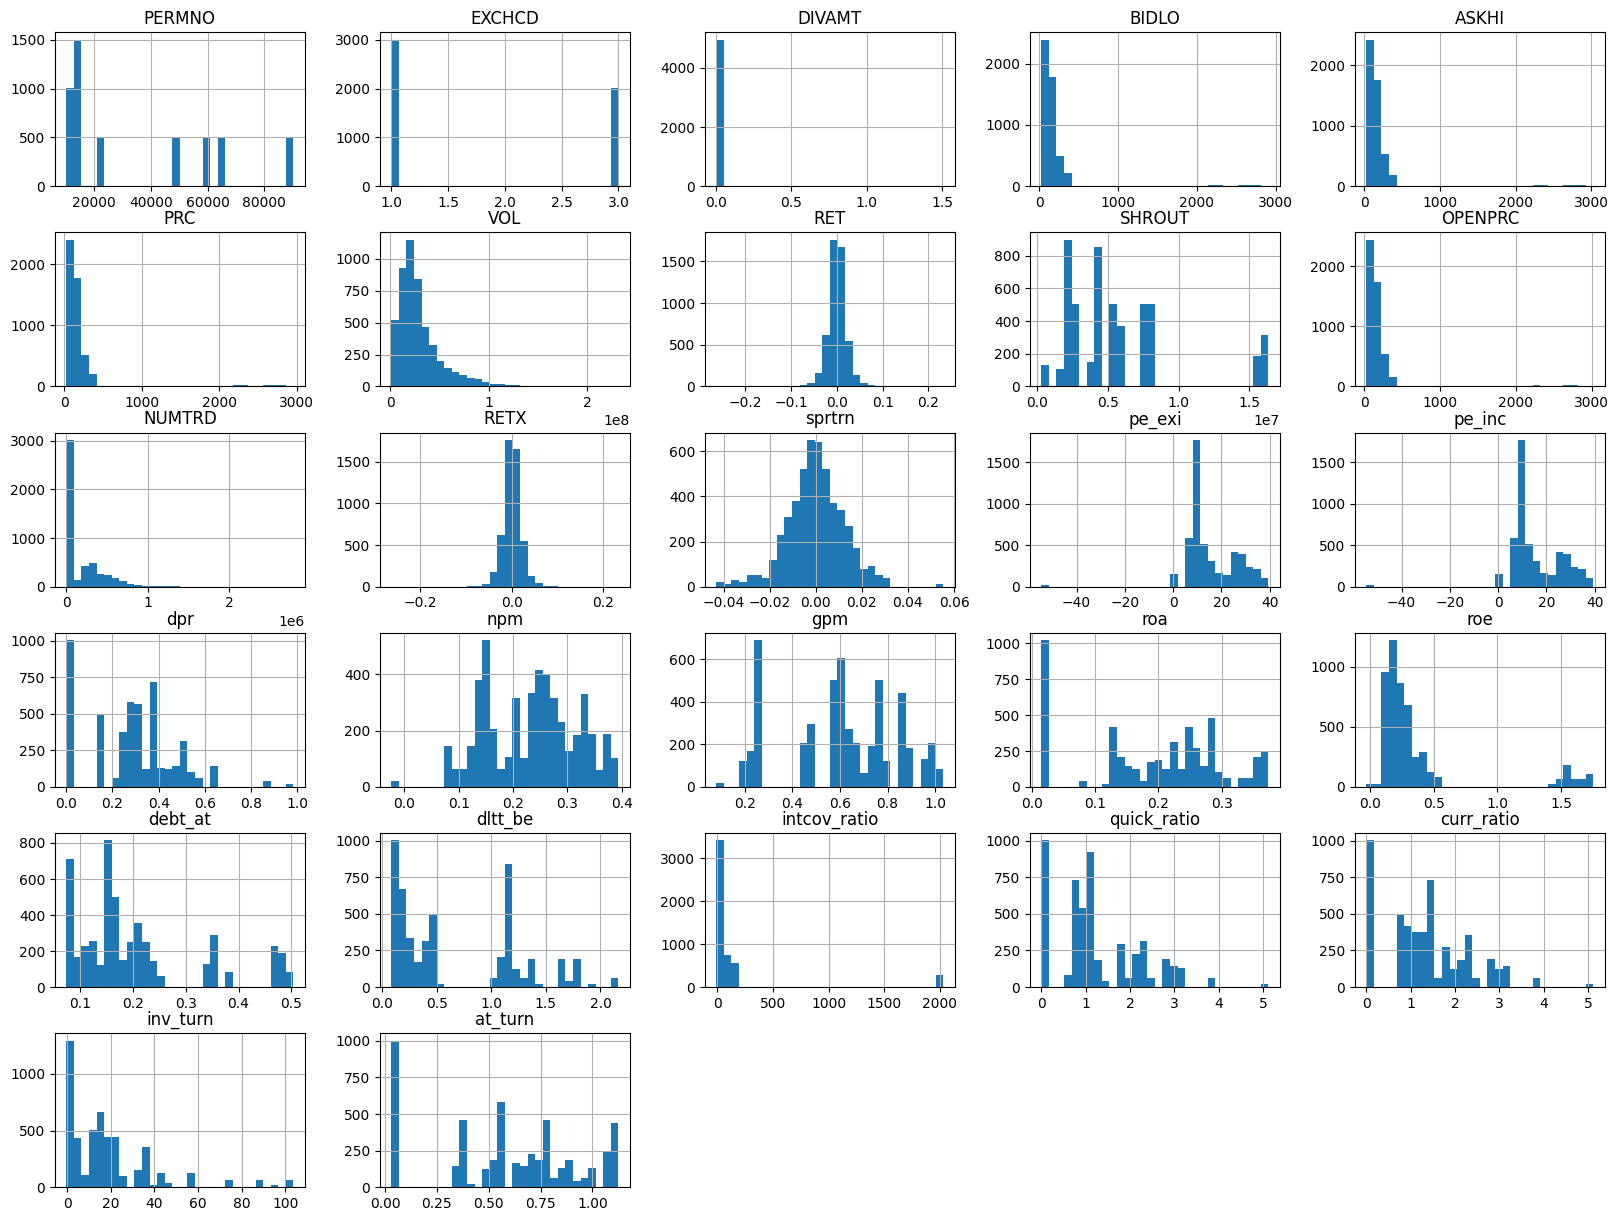

In [ ]:
df_numeric.hist(bins=30, figsize=(20, 15))
plt.show()

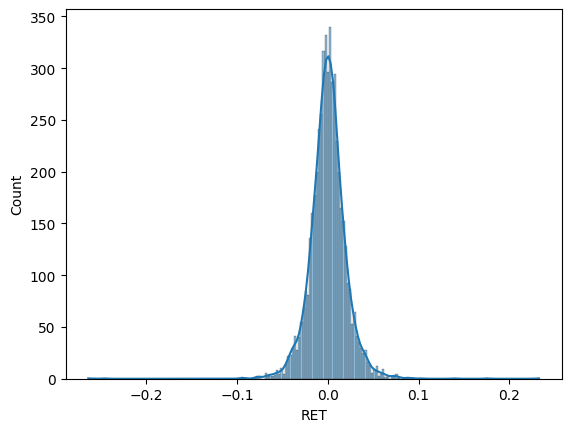

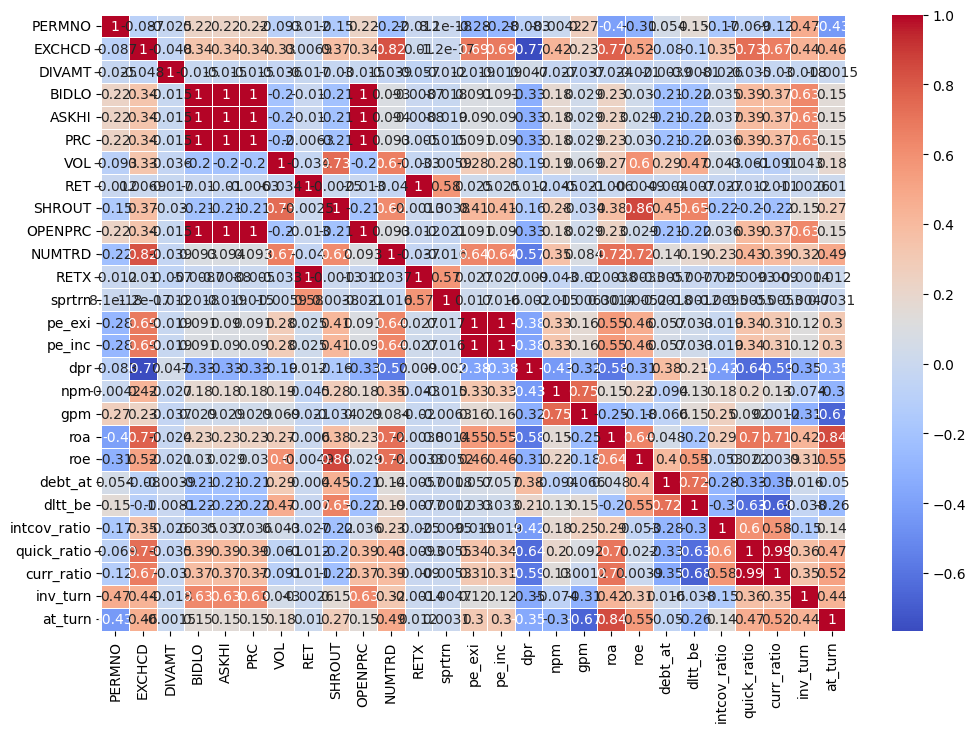

In [ ]:
sns.histplot(df_numeric['RET'], kde=True)
plt.show()

corr_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

        count      mean       std       min       25%       50%       75%  \
PERMNO                                                                      
10107   501.0  0.000446  0.019337 -0.077156 -0.010974  0.000405  0.012272   
11850   501.0  0.001310  0.019250 -0.078853 -0.010143  0.001629  0.012808   
13407   501.0  0.000691  0.033896 -0.263901 -0.013124  0.000648  0.015643   
14541   501.0  0.000788  0.017957 -0.067205 -0.008611  0.001121  0.010787   
14593   501.0  0.000351  0.018331 -0.058680 -0.009618  0.000628  0.010139   
21936   501.0 -0.001155  0.015784 -0.067180 -0.011179 -0.001203  0.008086   
47896   501.0  0.000395  0.016207 -0.061463 -0.008527  0.001016  0.008954   
59408   501.0 -0.000274  0.018768 -0.063736 -0.011224 -0.001459  0.008974   
65875   501.0 -0.000288  0.014361 -0.074978 -0.007187  0.000261  0.007134   
90319   501.0  0.000168  0.021951 -0.095094 -0.012997 -0.000084  0.012629   

             max  
PERMNO            
10107   0.082268  
11850   0.064113  

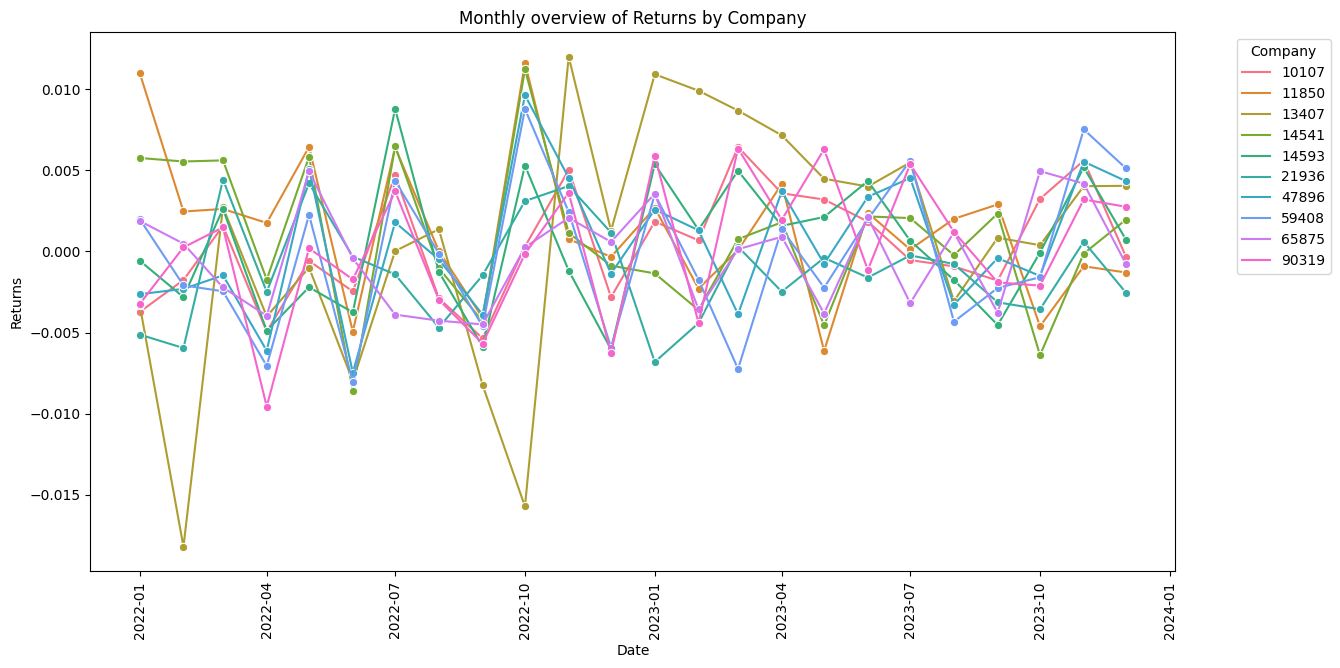

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['RET'] = pd.to_numeric(df['RET'], errors='coerce')

df['Month'] = df['date'].dt.to_period('M').dt.to_timestamp()
df_monthly = df.groupby(['Month', 'PERMNO'])['RET'].mean().reset_index()

summary_stats = df.groupby('PERMNO')['RET'].describe()
print(summary_stats)

plt.figure(figsize=(14, 7))
palette = sns.color_palette("husl", len(df['PERMNO'].unique()))

sns.lineplot(data=df_monthly, x='Month', y='RET', hue='PERMNO', palette=palette, marker='o')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Monthly overview of Returns by Company')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

# 5. Prescriptive Analysis (Rolling Windows and Allocating Weights)

# 6. Performance Assessment

# 7. Conclusions

# 9. Limitations and Further Steps